In [5]:
from astropy.table import Table
import glob

In [6]:
%matplotlib inline
import pylab as pl
import numpy as np

In [7]:
from brick2221.analysis.plot_tools import star_density_color
from brick2221.analysis import plot_tools
from brick2221.analysis import analysis_setup
from brick2221.analysis import selections

/Users/adam/work/brick/jwst/brick-jwst-2221/brick2221/reduction/filtering.py:29: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm
Set DATE-AVG to '2022-08-28T03:05:32.473' from MJD-AVG.
Set DATE-END to '2022-08-28T03:34:03.557' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -20.651775 from OBSGEO-[XYZ].
Set OBSGEO-H to 1526292809.682 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


For module merged catalog crowdsource_nsky0_merged_photometry_tables_merged.fits, mod date is 2024-08-18 23:26:57
For module merged-reproject catalog crowdsource_nsky0_merged-reproject_photometry_tables_merged.fits, mod date is 2024-08-18 23:27:01


In [10]:
import sys
sys.argv = ['dummy', '--module', 'merged1182_daophot_basic_indivexp']
result = selections.main()
globals().update(result)
basetable = result['basetable']
ww = result['ww']

Selecting module merged1182_daophot_basic_indivexp

merged1182_daophot_basic_indivexp
Selecting based on filters ['f410m', 'f212n', 'f466n', 'f405n', 'f187n', 'f182m', 'f444w', 'f356w', 'f200w', 'f115w']
2032 saturated in near_saturated_f212n_f212n
116 saturated in near_saturated_f466n_f466n
1562 saturated in near_saturated_f405n_f405n
943 saturated in near_saturated_f187n_f187n
17207 saturated in near_saturated_f182m_f182m
32471 saturated in near_saturated_f444w_f444w
40458 saturated in near_saturated_f356w_f356w
55206 saturated in near_saturated_f200w_f200w
2501 saturated in near_saturated_f115w_f115w
117639 near saturated out of 2922158.  That leaves 2804519 not near unsaturated
2032 saturated in near_saturated_f212n_f212n
116 saturated in near_saturated_f466n_f466n
1562 saturated in near_saturated_f405n_f405n
943 saturated in near_saturated_f187n_f187n
17207 saturated in near_saturated_f182m_f182m
31324 near saturated out of 2922158.  That leaves 2890834 not near unsaturated
61 sat

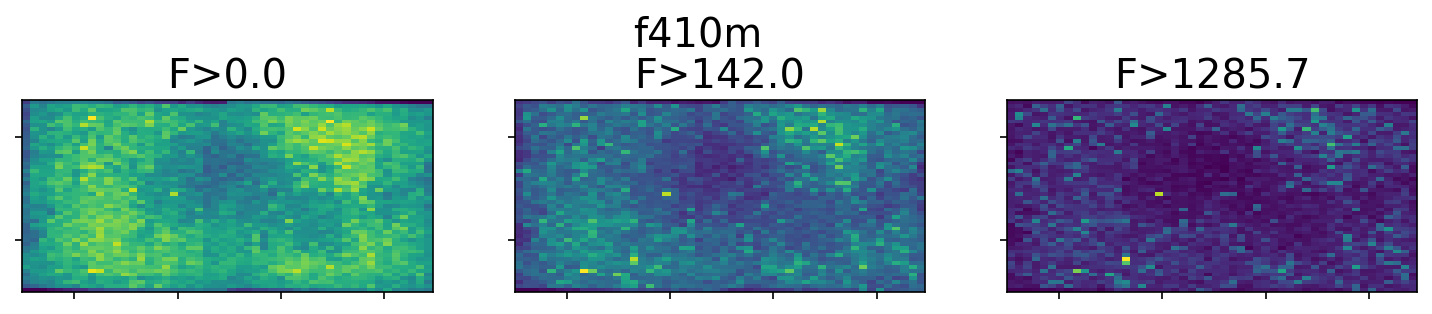

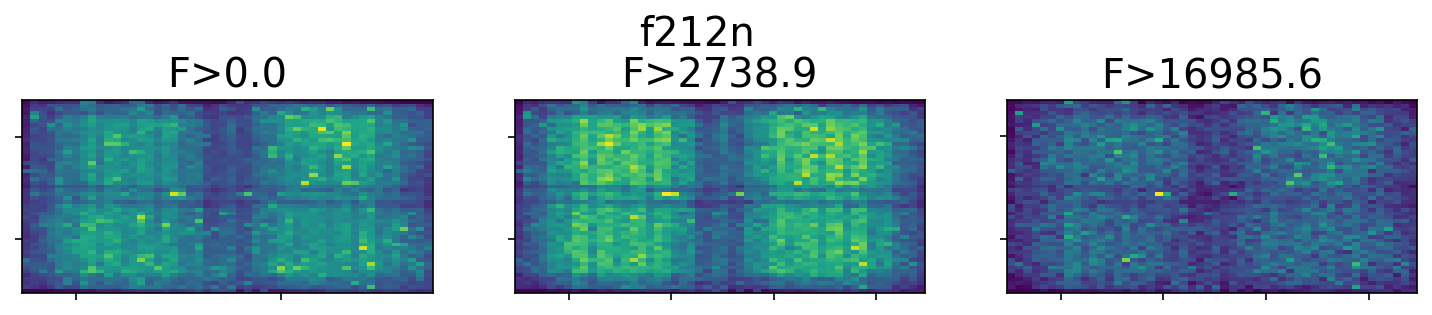

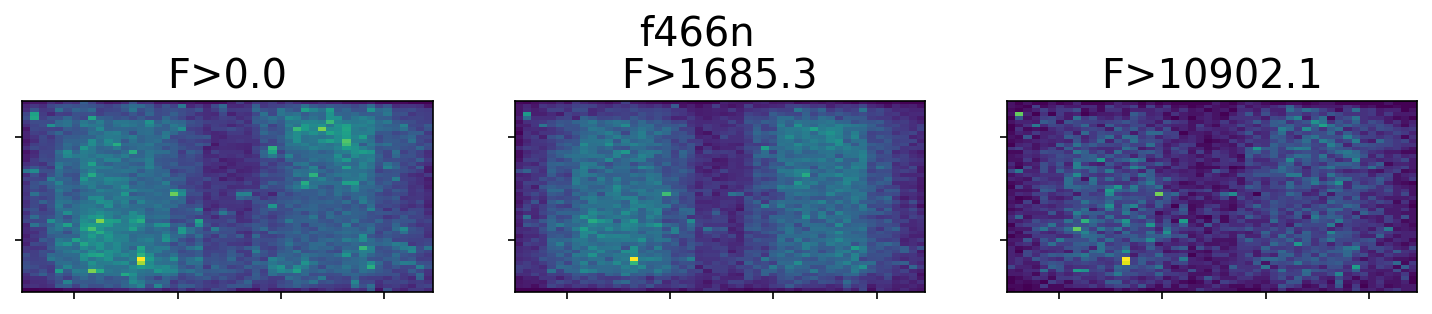

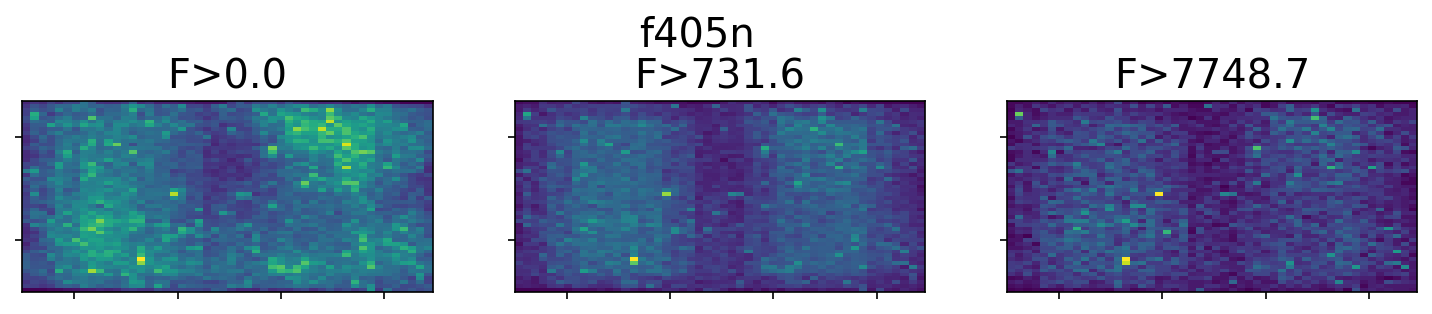

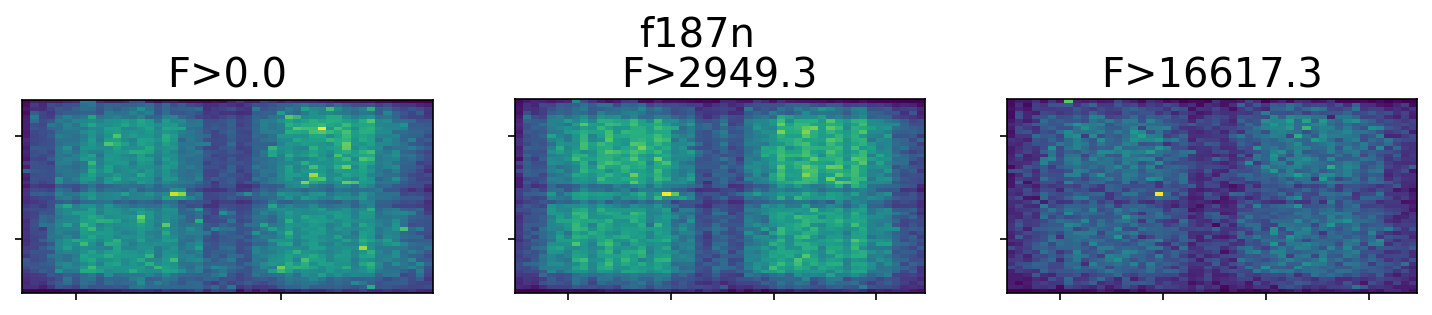

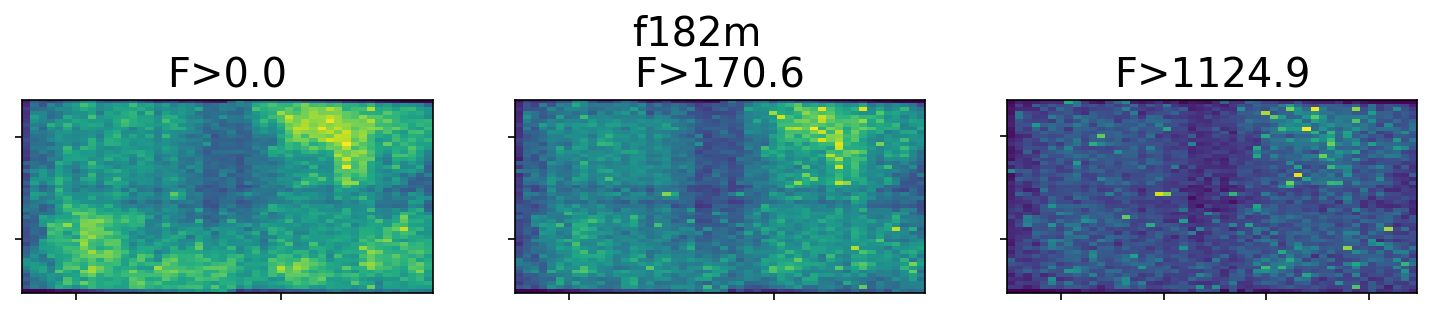

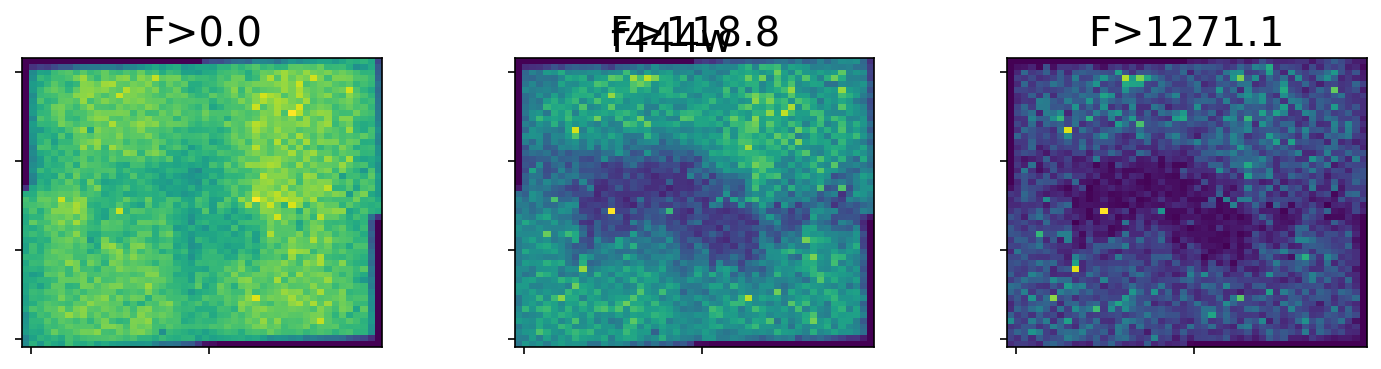

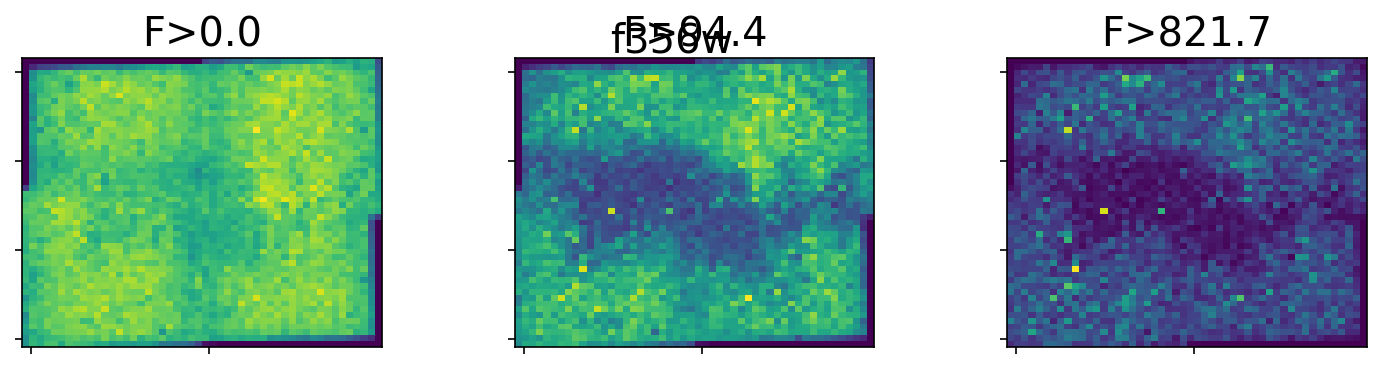

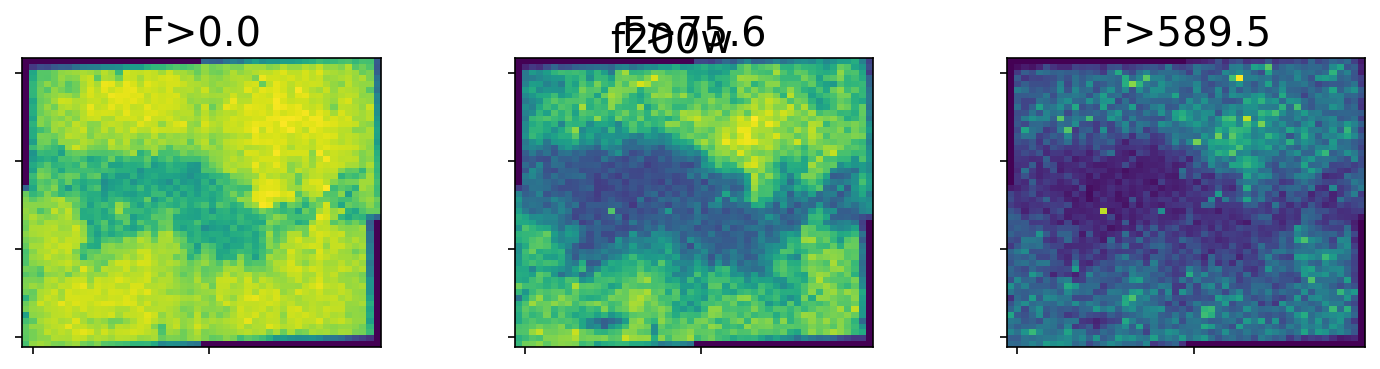

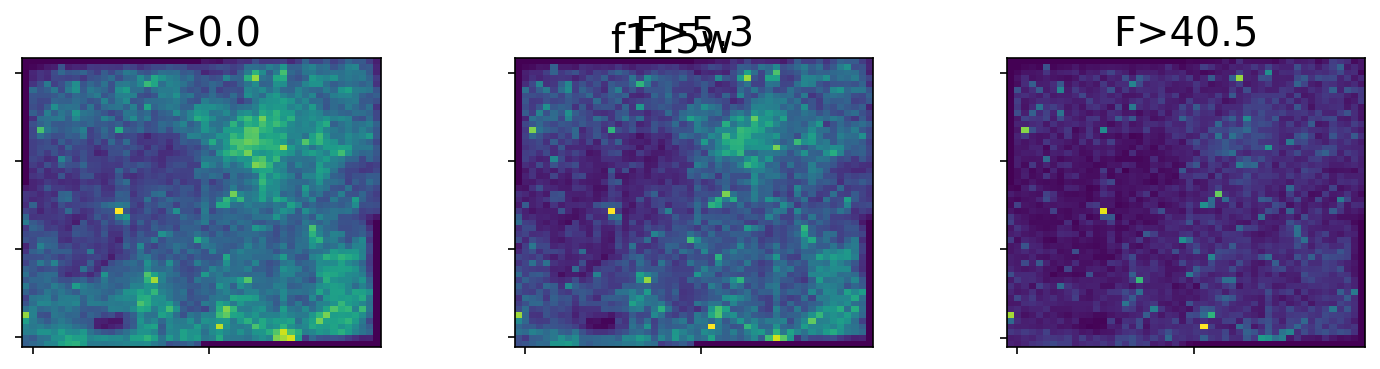

In [14]:
for filtername in plot_tools.all_filternames:

    if 'W' in filtername:
        fig = pl.figure(figsize=(12, 3.5), dpi=150)
    else:
        fig = pl.figure(figsize=(12, 2.5), dpi=150)
    
    crds = basetable[f'skycoord_{filtername}']
    flux = np.array(basetable[f'flux_{filtername}'])
    for ii, thresh in enumerate((0, np.nanpercentile(flux, 50), np.nanpercentile(flux, 90))):
        ax = pl.subplot(1, 3, ii+1)
        sel = flux > thresh
        ax.hist2d(crds.dec[sel].value, crds.ra[sel].value, bins=(50,50));
        ax.set_title(f"F>{thresh:0.1f}")
        ax.set_aspect('equal')
        ax.set_yticklabels([])
        ax.set_xticklabels([])
    fig.suptitle(filtername)

In [4]:
from brick2221.analysis.paths import basepath
for dirpath in glob.glob(f'{basepath}/F*'):
    catname = glob.glob(f'{dirpath}/*_merged_crowdsource_nsky0.fits')[0]
    
    filtername = catname.split("/")[-2]
    
    tbl = Table.read(catname)
    
    if 'W' in filtername:
        fig = pl.figure(figsize=(12, 3.5), dpi=150)
    else:
        fig = pl.figure(figsize=(12, 2.5), dpi=150)
    
    crds = tbl['skycoord']
    flux = tbl['flux']
    for ii, thresh in enumerate((0, np.percentile(flux, 50), np.percentile(flux, 90))):
        ax = pl.subplot(1, 3, ii+1)
        sel = flux > thresh
        ax.hist2d(crds.dec[sel].value, crds.ra[sel].value, bins=(50,50));
        ax.set_title(f"F>{thresh:0.1f}")
        ax.set_aspect('equal')
        ax.set_yticklabels([])
        ax.set_xticklabels([])
    fig.suptitle(filtername)

IndexError: list index out of range

In [3]:
tbl['skycoord']

<SkyCoord (ICRS): (ra, dec) in deg
    [(266.49793421, -28.73534786), (266.49797418, -28.73496256),
     (266.4979465 , -28.73454815), ..., (266.57888922, -28.65340245),
     (266.57825169, -28.68660244), (266.57827757, -28.68593705)]>